# Author: Devati Trinay Mithra
## Prediction using Unsupervised ML
### Task - Predict optimum number of clusters and represent visually

Working using Python Language on Jupyer Notebook

###### Import all the necessary modules for the task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans

###### Load the data into dataframe

In [2]:
df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### Find optimum number of clusters

In [3]:
data = df.iloc[:, [1,2,3,4]].values #consider sepal and petal data for clustering

within_cluster_sum_of_squares = [] #this list contains wcss for each number of clusters in range(1,11)

#find ideal number of clusters by selecting the number of clusters at 'elbow' point in the graph
for i in range(1, 11) :
    km = KMeans( n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data)
    within_cluster_sum_of_squares.append(km.inertia_)
within_cluster_sum_of_squares[:5]

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034]

###### Plot Cluster sum of squares against number of clusters

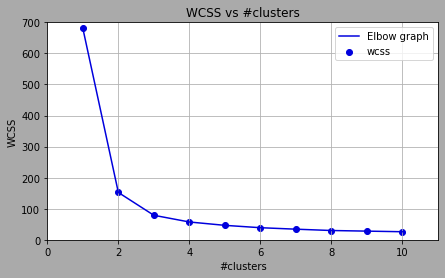

In [4]:
plt.figure(figsize=(7, 4), facecolor='#aaaaaa')
plt.xlim(0, 11)
plt.ylim(0, 700)
plt.plot(range(1,11), within_cluster_sum_of_squares, label = "Elbow graph", color = "#0000DD")  
plt.scatter(range(1,11), within_cluster_sum_of_squares, label = "wcss", color = "#0000DD")  
plt.title('WCSS vs #clusters')  
plt.xlabel('#clusters')  
plt.ylabel('WCSS')  
plt.grid()
plt.legend()
plt.show()

###### From the above graph, we can clearly observe that the elbow point is at #clusters = 3

###### So, from here, we are going to consider number of clusters = 3

###### Create a kmeans classifier and clusterize the data

In [5]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_kmeans = km.fit_predict(data)

### Now let's visualize the clusters

###### Visualizing data on sepal length vs sepal width

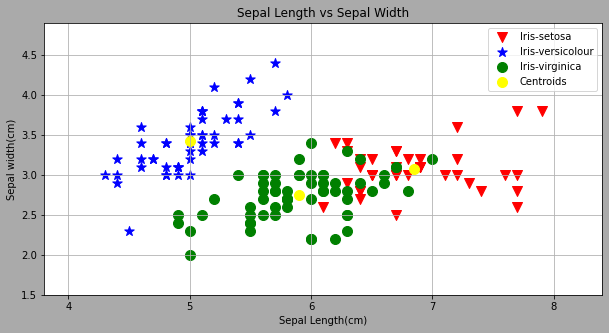

In [6]:
plt.figure(figsize=(10, 5), facecolor='#aaaaaa')
plt.xlim(data.min(axis = 0)[0] - 0.5, data.max(axis = 0)[0] + 0.5)
plt.ylim(data.min(axis = 0)[1] - 0.5, data.max(axis = 0)[1] + 0.5)
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', marker = 'v', label = 'Iris-setosa')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', marker = '*', label = 'Iris-versicolour')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'green', marker = 'o', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Sepal Length vs Sepal Width')  
plt.xlabel('Sepal Length(cm)')  
plt.ylabel('Sepal width(cm)')  
plt.grid()
plt.legend()
plt.show()

###### Visualizing data on petal length vs petal width

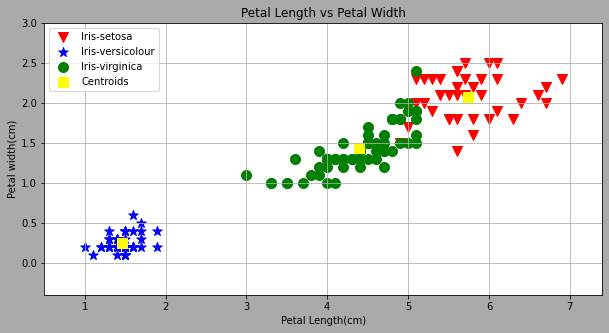

In [7]:
plt.figure(figsize=(10, 5), facecolor='#aaaaaa')
plt.xlim(data.min(axis = 0)[2] - 0.5, data.max(axis = 0)[2] + 0.5)
plt.ylim(data.min(axis = 0)[3] - 0.5, data.max(axis = 0)[3] + 0.5)
plt.scatter(data[y_kmeans == 0, 2], data[y_kmeans == 0, 3], s = 100, c = 'red', marker = 'v', label = 'Iris-setosa')
plt.scatter(data[y_kmeans == 1, 2], data[y_kmeans == 1, 3], s = 100, c = 'blue', marker = '*', label = 'Iris-versicolour')
plt.scatter(data[y_kmeans == 2, 2], data[y_kmeans == 2, 3], s = 100, c = 'green', marker = 'o', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 100, c = 'yellow', marker = 's', label = 'Centroids')

plt.title('Petal Length vs Petal Width')  
plt.xlabel('Petal Length(cm)')  
plt.ylabel('Petal width(cm)')  
plt.grid()
plt.legend()
plt.show()

###### Visualizing data on Sepal length vs Petal length

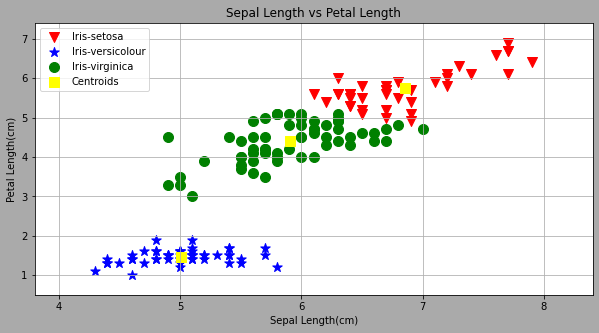

In [8]:
plt.figure(figsize=(10, 5), facecolor='#aaaaaa')
plt.xlim(data.min(axis = 0)[0] - 0.5, data.max(axis = 0)[0] + 0.5)
plt.ylim(data.min(axis = 0)[2] - 0.5, data.max(axis = 0)[2] + 0.5)
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 2], s = 100, c = 'red', marker = 'v', label = 'Iris-setosa')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 2], s = 100, c = 'blue', marker = '*', label = 'Iris-versicolour')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 2], s = 100, c = 'green', marker = 'o', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,2], s = 100, c = 'yellow', marker = 's', label = 'Centroids')

plt.title('Sepal Length vs Petal Length')  
plt.xlabel('Sepal Length(cm)')  
plt.ylabel('Petal Length(cm)')  
plt.grid()
plt.legend()
plt.show()

###### Visualizing data on sepal width vs petal width

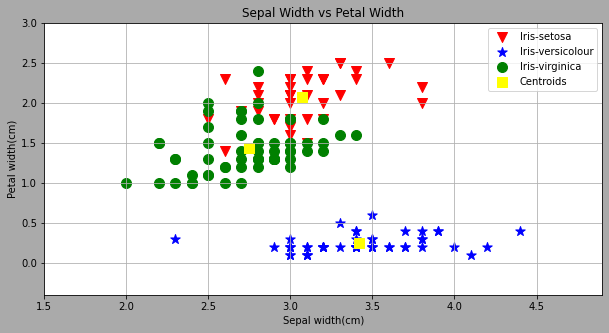

In [9]:
plt.figure(figsize=(10, 5), facecolor='#aaaaaa')
plt.xlim(data.min(axis = 0)[1] - 0.5, data.max(axis = 0)[1] + 0.5)
plt.ylim(data.min(axis = 0)[3] - 0.5, data.max(axis = 0)[3] + 0.5)
plt.scatter(data[y_kmeans == 0, 1], data[y_kmeans == 0, 3], s = 100, c = 'red', marker = 'v', label = 'Iris-setosa')
plt.scatter(data[y_kmeans == 1, 1], data[y_kmeans == 1, 3], s = 100, c = 'blue', marker = '*', label = 'Iris-versicolour')
plt.scatter(data[y_kmeans == 2, 1], data[y_kmeans == 2, 3], s = 100, c = 'green', marker = 'o', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:,3], s = 100, c = 'yellow', marker = 's', label = 'Centroids')

plt.title('Sepal Width vs Petal Width')  
plt.xlabel('Sepal width(cm)')  
plt.ylabel('Petal width(cm)')  
plt.grid()
plt.legend()
plt.show()